# Random Forest

### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

### 2. Load data

In [4]:
DATA_PATH = os.path.join("..", "DataSet", "Air_quality_cleaned_v1.csv")
df = pd.read_csv(DATA_PATH)

### 3. เลือกคอลัมน์

In [ ]:
df = df[['Date', 'Time', 'PM2.5', 'VOC', 'CO2', 'HCHO',]]

### 4. จัดการ Missing Values (กรณีบางค่าอาจหายไปในบางแถว)

In [12]:
print(df.dtypes)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.isnull().sum())

Date         object
Time         object
Temp        float64
Humidity    float64
PM2.5         int64
VOC         float64
CO2           int64
HCHO        float64
dtype: object
Date        0
Time        0
Temp        0
Humidity    0
PM2.5       0
VOC         0
CO2         0
HCHO        0
dtype: int64


### 5.  เลือก Features และ Target

In [24]:
X = df[['Temp', 'Humidity', 'PM2.5', 'VOC', 'Temp', 'Humidity', 'HCHO']]  # Feature
y = df['CO2']  # Target

### 6. แบ่งข้อมูลเป็น Train และ Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 7. Scaling ข้อมูล

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 8. Train Random Forest Model

In [27]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

### 9. ทำนายผล

In [28]:
y_pred = rf.predict(X_test_scaled)

### 10. วัดผล Model

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2%}")

MSE: 63.51
MAE: 4.00
R-squared: 95.93%


### 11. วิเคราะห์ Feature Importance

C:\Users\WIN 10 PRO 22H2\AppData\Local\Temp\ipykernel_21328\1292790911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


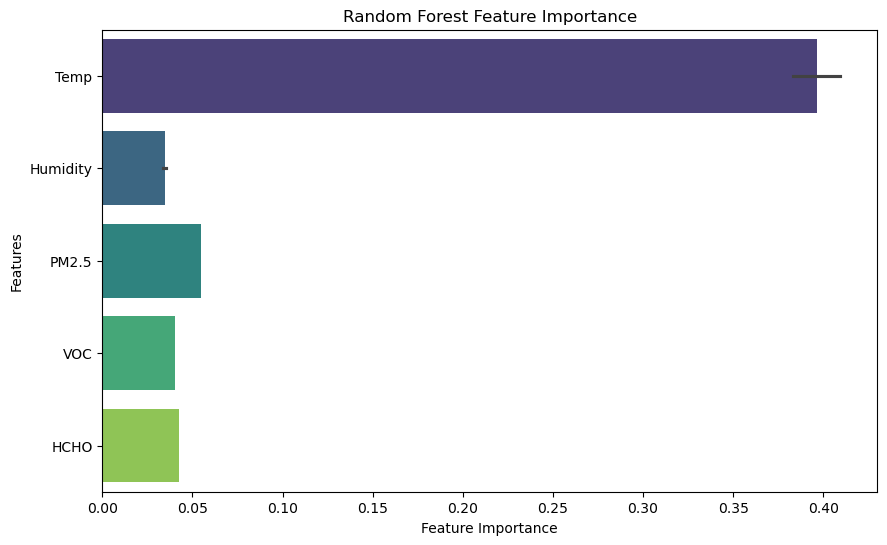

In [32]:
feature_importance = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

### 12. Correlation Matrix

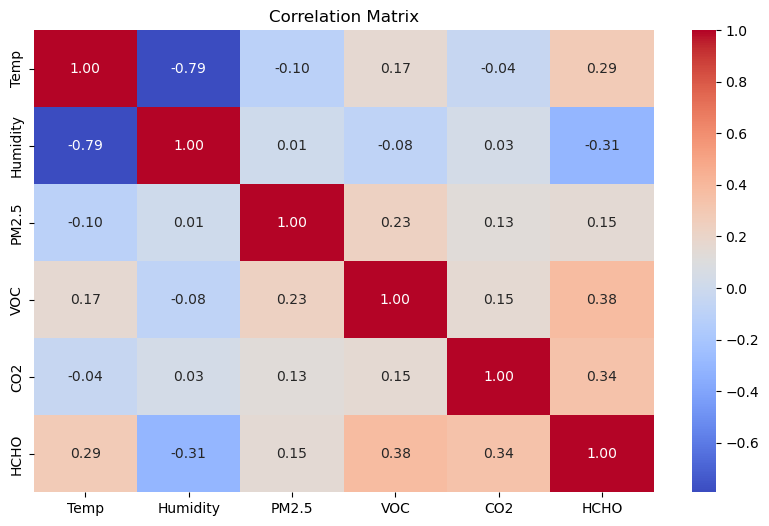

In [33]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### 13. บันทึก Model และ Scaler

In [ ]:
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

##### ขั้นตอนต่อไปในการพัฒนาโมเดล:
- ใช้ GridSearchCV หรือ RandomizedSearchCV เพื่อปรับค่าพารามิเตอร์ของ Random Forest
- ทดลองใช้ Algorithms อื่น ๆ เช่น XGBoost หรือ Gradient Boosting
- ใช้ Cross-validation เพื่อตรวจสอบความเสถียรของโมเดล
- สร้าง Dashboard สำหรับแสดงผลลัพธ์และ AQI แบบเรียลไทม์